<a id='top-page'></a>
# <img src="../images/PCAfold-logo.svg" style="height:100px"> Demo for data clustering

In this tutorial, we present the clustering functionalities from the `preprocess` module.

## Data clustering

Firstly, we visualize the result of clustering on synthetic 2D and 3D data sets:

- [**Visualizing the clustering result in 2D**](#2d-clustering)
- [**Visualizing the clustering result in 3D**](#3d-clustering)

Next, we demonstrate data clustering using the available clustering functions based on binning a single variable:

- [**Clustering based on binning a single variable**](#single_variable)
    - [**Cluster into equal variable bins**](#variable_bins)
    - [**Cluster into pre-defined variable bins**](#predefined_bins)
    - [**Cluster into zero-neighborhood variable bins**](#zero_neighborhood_bins)

Finally, we demonstrate some functionalities useful for clustering combustion data sets:

- [**Clustering combustion data sets**](#combustion)
    - [**Cluster into bins of the mixture fraction vector**](#mixture_fraction_bins)
    - [**Separating close-to-zero principal component source terms**](#PC_source)



- [**References**](#references)

***

**Should plots be saved?**

In [ ]:
save_plots = False

***

We import the necessary modules:

In [2]:
from PCAfold import preprocess
from PCAfold import reduction
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans
%matplotlib inline

and we set some initial parameters:

In [3]:
x_label = '$x$'
y_label = '$y$'
z_label = '$z$'
figure_size = (6,3)
color_map = ListedColormap(['#0e7da7', '#ceca70', '#b45050', '#2d2d54'])
save_filename = None
random_seed = 200

***

<a id='2d-clustering'></a>
## Visualizing the clustering result in 2D

[**↑ Go to the top**](#top-page)

We begin by demonstrating how the result of clustering can be visualized using the
plotting functionalities from the ``preprocess`` module.

We generate a synthetic 2D data set composed of two distinct clouds:

In [4]:
np.random.seed(seed=random_seed)

n_observations = 1000

mean_1 = [0,1]
mean_2 = [6,4]
covariance_1 = [[2, 0.5], [0.5, 0.5]]
covariance_2 = [[3, 0.3], [0.3, 0.5]]

x_1, y_1 = np.random.multivariate_normal(mean_1, covariance_1, n_observations).T
x_2, y_2 = np.random.multivariate_normal(mean_2, covariance_2, n_observations).T
x = np.concatenate([x_1, x_2])[:,None]
y = np.concatenate([y_1, y_2])[:,None]

The original data set can be visualized using the function from the ``reduction`` module:

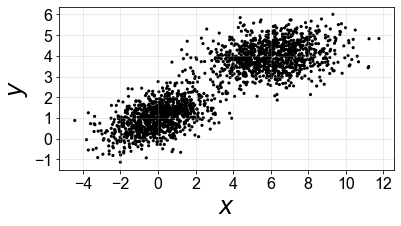

In [5]:
if save_plots==True: save_filename = '../images/tutorial-clustering-cloud-2d-data-set.svg'
plt = reduction.plot_2d_manifold(x, y, x_label=x_label, y_label=y_label, figure_size=figure_size, save_filename=save_filename)

We divide the data into two clusters using the K-Means algorithm:

In [6]:
idx_kmeans = KMeans(n_clusters=2).fit(np.hstack((x, y))).labels_

As soon as the ``idx`` vector of cluster classification is known for the data set,
the result of clustering can be visualized using the ``plot_2d_clustering`` function.

We plot the result of K-Means clustering on the 2D data set:

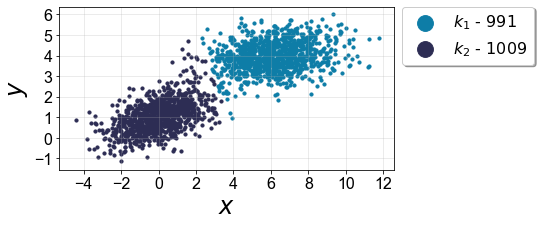

In [7]:
if save_plots==True: save_filename = '../images/tutorial-clustering-cloud-2d-data-set-kmeans.svg'
plt = preprocess.plot_2d_clustering(x, y, idx_kmeans, x_label=x_label, y_label=y_label, color_map=color_map, first_cluster_index_zero=False, grid_on=True, figure_size=figure_size, save_filename=save_filename)

Note, that the numbers in the legend, next to each cluster number, represent the
number of samples in a particular cluster. The populations of each cluster can also be
computed and printed, for instance through:

In [8]:
print(preprocess.get_populations(idx_kmeans))

[991, 1009]


***

<a id='3d-clustering'></a>
## Visualizing the clustering result in 3D

[**↑ Go to the top**](#top-page)

Clustering result can also be visualized in a three-dimensional space. In this
example, we generate a synthetic 3D data set composed of three connected planes:

In [9]:
n_observations = 50

x = np.tile(np.linspace(0,50,n_observations), n_observations)
y = np.zeros((n_observations,1))
z = np.zeros((n_observations*n_observations,1))

for i in range(1,n_observations):
    y = np.vstack((y, np.ones((n_observations,1))*i))
y = y.ravel()

for observation, x_value in enumerate(x):
    
    y_value = y[observation]
    
    if x_value <= 10:
        z[observation] = 2 * x_value + y_value
    elif x_value > 10 and x_value <= 35:
        z[observation] = 10 * x_value + y_value - 80
    elif x_value > 35:
        z[observation] = 5 * x_value + y_value + 95
        
(x, _, _) = preprocess.center_scale(x[:,None], scaling='0to1')
(y, _, _) = preprocess.center_scale(y[:,None], scaling='0to1')
(z, _, _) = preprocess.center_scale(z, scaling='0to1')

The original data set can be visualized using the function from the ``reduction`` module:

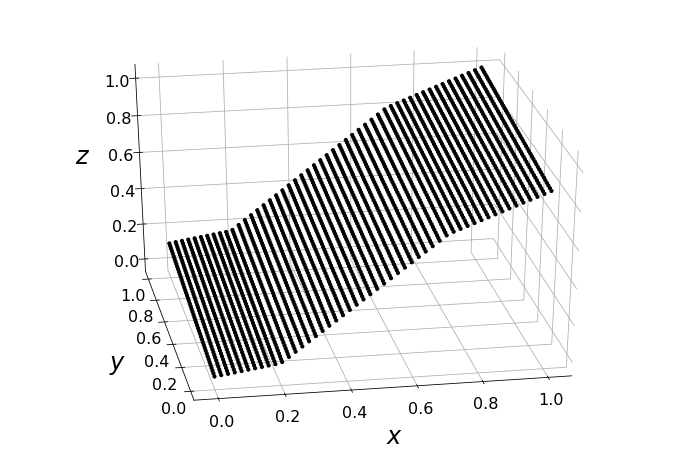

In [10]:
if save_plots==True: save_filename = '../images/tutorial-clustering-3d-data-set.svg'
plt = reduction.plot_3d_manifold(x, y, z, elev=30, azim=-100, x_label=x_label, y_label=y_label, z_label=z_label, figure_size=(12,8), save_filename=save_filename)

We divide the data into four clusters using the K-Means algorithm:

In [11]:
idx_kmeans = KMeans(n_clusters=4).fit(np.hstack((x, y, z))).labels_

The result of K-Means clustering can then be plotted in 3D:

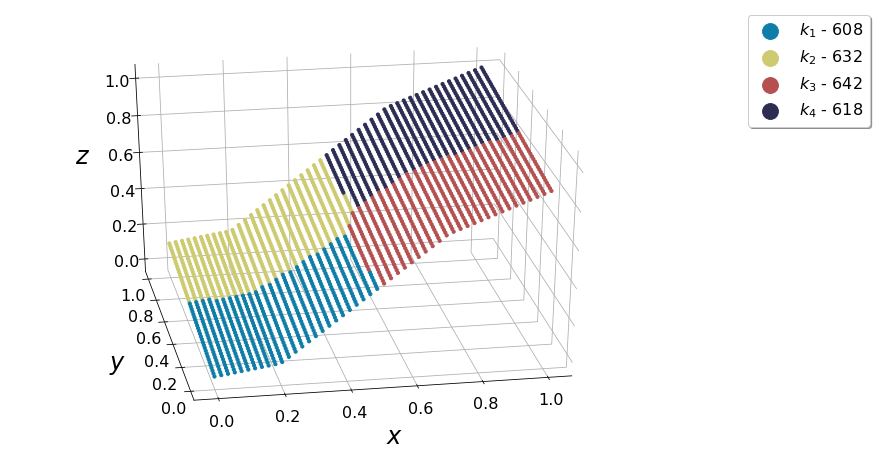

In [12]:
if save_plots==True: save_filename = '../images/tutorial-clustering-3d-data-set-kmeans.svg'
plt = preprocess.plot_3d_clustering(x, y, z, idx_kmeans, elev=30, azim=-100, x_label=x_label, y_label=y_label, z_label=z_label, color_map=color_map, first_cluster_index_zero=False, figure_size=(12,8), save_filename=save_filename)

<a id='single_variable'></a>

***

## Clustering based on binning a single variable

[**↑ Go to the top**](#top-page)

In this section, we demonstrate a few clustering functions that are implemented
in **PCAfold**. All of them cluster data sets based on binning a single variable.

First, we generate a synthetic two-dimensional data set:

In [13]:
x = np.linspace(-1,1,100)
y = -x**2 + 1

The data set can be visualized using the function from the ``reduction`` module:

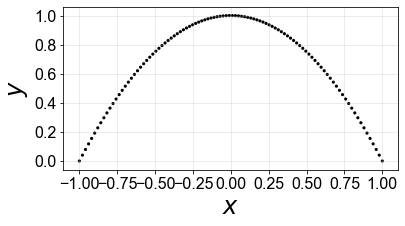

In [14]:
if save_plots==True: save_filename = '../images/tutorial-clustering-original-data-set.svg'
plt = reduction.plot_2d_manifold(x, y, x_label=x_label, y_label=y_label, figure_size=figure_size, save_filename=save_filename)

We will now cluster the 2D data set according to bins of a single variable, $x$.

<a id='variable_bins'></a>
### Cluster into equal variable bins

[**↑ Go to the top**](#top-page)

<img src="../images/clustering-variable-bins.svg" style="height:80px">

This clustering will divide the data set based on equal bins of a variable vector.

In [15]:
(idx_variable_bins, borders_variable_bins) = preprocess.variable_bins(x, 4, verbose=True)

Border values for bins:
[-1.0, -0.5, 0.0, 0.5, 1.0]

Bounds for cluster 0:
	-1.0, -0.5152
Bounds for cluster 1:
	-0.4949, -0.0101
Bounds for cluster 2:
	0.0101, 0.4949
Bounds for cluster 3:
	0.5152, 1.0


The result of clustering can be plotted in 2D:

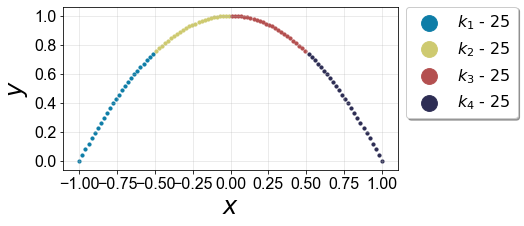

In [16]:
if save_plots==True: save_filename = '../images/tutorial-clustering-variable-bins-k4.svg'
plt = preprocess.plot_2d_clustering(x, y, idx_variable_bins, x_label=x_label, y_label=y_label, color_map=color_map, first_cluster_index_zero=False, grid_on=True, figure_size=figure_size, save_filename=save_filename)

Note that this clustering function created four equal bins in the space of $x$.
In this case, since $x$ ranges from -1 to 1, the bins are created as
intervals of length 0.5 in the $x$-space.

<a id='predefined_bins'></a>
### Cluster into pre-defined variable bins

[**↑ Go to the top**](#top-page)

<img src="../images/clustering-predefined-variable-bins.svg" style="height:80px">

This clustering will divide the data set into bins of a one-dimensional variable vector whose borders are specified by the user. Let's specify the split values as ``split_values = [-0.6, 0.4, 0.8]``:

In [17]:
split_values = [-0.6, 0.4, 0.8]
(idx_predefined_variable_bins, borders_predefined_variable_bins) = preprocess.predefined_variable_bins(x, split_values, verbose=True)

Border values for bins:
[-1.0, -0.6, 0.4, 0.8, 1.0]

Bounds for cluster 0:
	-1.0, -0.6162
Bounds for cluster 1:
	-0.596, 0.3939
Bounds for cluster 2:
	0.4141, 0.798
Bounds for cluster 3:
	0.8182, 1.0


The visual result of this clustering can be seen below:

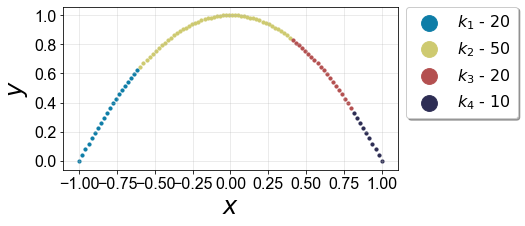

In [18]:
if save_plots==True: save_filename = '../images/tutorial-clustering-predefined-variable-bins-k4.svg'
plt = preprocess.plot_2d_clustering(x, y, idx_predefined_variable_bins, x_label=x_label, y_label=y_label, color_map=color_map, first_cluster_index_zero=False, grid_on=True, figure_size=figure_size, save_filename=save_filename)

This clustering function created four bins in the space of $x$, where
the splits in the $x$-space are located at $x=-0.6$, $x=0.4$ and $x=0.8$.

<a id='zero_neighborhood_bins'></a>
### Cluster into zero-neighborhood variable bins

[**↑ Go to the top**](#top-page)

This partitioning relies on unbalanced variable vector which, in principle,
is assumed to have a lot of observations whose values are close to zero and
relatively few observations with values away from zero.
This function can be used to separate close-to-zero observations into one
cluster (``split_at_zero=False``) or two clusters (``split_at_zero=True``).

#### Without splitting at zero, ``split_at_zero=False``

<img src="../images/clustering-zero-neighborhood-bins.svg" style="height:100px">

In [19]:
(idx_zero_neighborhood_bins, borders_zero_neighborhood_bins) = preprocess.zero_neighborhood_bins(x, 3, zero_offset_percentage=10, split_at_zero=False, verbose=True)

Border values for bins:
[-1.  -0.2  0.2  1. ]

Bounds for cluster 0:
	-1.0, -0.2121
Bounds for cluster 1:
	-0.1919, 0.1919
Bounds for cluster 2:
	0.2121, 1.0


The visual result of this clustering can be seen below:

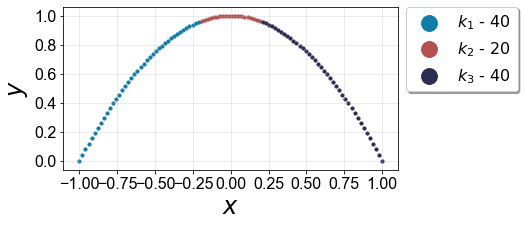

In [20]:
if save_plots==True: save_filename = '../images/tutorial-clustering-zero-neighborhood-bins-k3.svg'
plt = preprocess.plot_2d_clustering(x, y, idx_zero_neighborhood_bins, x_label=x_label, y_label=y_label, color_map=color_map, first_cluster_index_zero=False, grid_on=True, figure_size=figure_size, save_filename=save_filename)

We note that the observations corresponding to $x \approx 0$ have been classified into one cluster ($k_2$).

#### With splitting at zero, ``split_at_zero=True``

<img src="../images/clustering-zero-neighborhood-bins-zero-split.svg" style="height:100px">

In [21]:
(idx_zero_neighborhood_bins_split_at_zero, borders_zero_neighborhood_bins_split_at_zero) = preprocess.zero_neighborhood_bins(x, 4, zero_offset_percentage=10, split_at_zero=True, verbose=True)

Border values for bins:
[-1.  -0.2  0.   0.2  1. ]

Bounds for cluster 0:
	-1.0, -0.2121
Bounds for cluster 1:
	-0.1919, -0.0101
Bounds for cluster 2:
	0.0101, 0.1919
Bounds for cluster 3:
	0.2121, 1.0


The visual result of this clustering can be seen below:

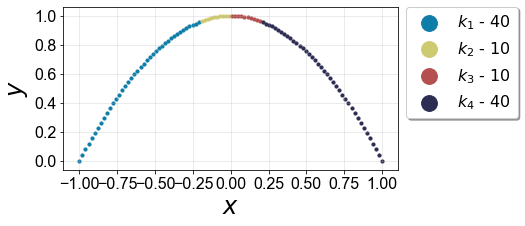

In [22]:
if save_plots==True: save_filename = '../images/tutorial-clustering-zero-neighborhood-bins-split-at-zero-k4.svg'
plt = preprocess.plot_2d_clustering(x, y, idx_zero_neighborhood_bins_split_at_zero, x_label=x_label, y_label=y_label, color_map=color_map, first_cluster_index_zero=False, grid_on=True, figure_size=figure_size, save_filename=save_filename)

We note that the observations corresponding to $x \approx 0^{-}$ have been classified into one cluster ($k_2$)
and the observations corresponding to $x \approx 0^{+}$ have been classified into another cluster ($k_3$).

<a id='combustion'></a>

***

## Clustering combustion data sets

[**↑ Go to the top**](#top-page)

In this section, we present functions that are specifically aimed for clustering
reactive flows data sets. We will use a data set representing combustion of
syngas in air, generated from the steady laminar
flamelet model using *Spitfire* software [[1]](#references) and a chemical
mechanism by Hawkes et al. [[2]](#references).

We import the flamelet data set:

In [23]:
X = np.genfromtxt('data-state-space.csv', delimiter=',')
S_X = np.genfromtxt('data-state-space-sources.csv', delimiter=',')
mixture_fraction = np.genfromtxt('data-mixture-fraction.csv', delimiter=',')

<a id='mixture_fraction_bins'></a>

### Cluster into bins of the mixture fraction vector

[**↑ Go to the top**](#top-page)

<img src="../images/clustering-mixture-fraction-bins.svg" style="height:80px">

In this example, we partition the data set into five bins of the mixture fraction vector.
This is a feasible clustering strategy for non-premixed flames which takes advantage
of the physics-based (supervised) partitioning of the data set based on local stoichiometry.
The partitioning function requires specifying the value for
the stoichiometric mixture fraction, $Z_{st}$ (``Z_stoich``). Note that the first split in the data set is
performed at $Z_{st}$ and further splits are performed automatically on
the fuel-lean and the fuel-rich branch.

In [24]:
Z_stoich = 0.273
(idx_mixture_fraction_bins, borders_mixture_fraction_bins) = preprocess.mixture_fraction_bins(mixture_fraction, 5, Z_stoich, verbose=True)

Border values for bins:
[0.         0.1365     0.273      0.51533333 0.75766667 1.        ]

Bounds for cluster 0:
	0.0, 0.1313
Bounds for cluster 1:
	0.1414, 0.2727
Bounds for cluster 2:
	0.2828, 0.5152
Bounds for cluster 3:
	0.5253, 0.7576
Bounds for cluster 4:
	0.7677, 1.0


Visualize clustering of the data set:

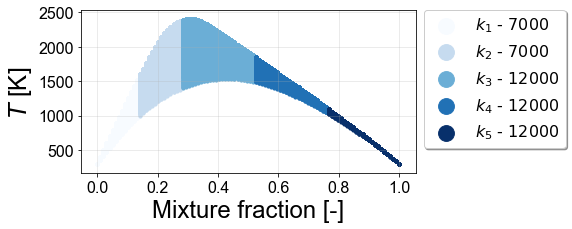

In [25]:
if save_plots==True: save_filename = '../images/tutorial-clustering-mixture-fraction-bins-k4.svg'
plt = preprocess.plot_2d_clustering(mixture_fraction, X[:,0], idx_mixture_fraction_bins, x_label='Mixture fraction [-]', y_label='$T$ [K]', color_map='Blues', first_cluster_index_zero=False, grid_on=True, figure_size=figure_size, save_filename=save_filename)

It can be seen that the data set is divided at the stoichiometric value of
mixture fraction, in this case $Z_{st} \approx 0.273$. The fuel-lean branch
(the part of the flamelet to the left of $Z_{st}$)
is divided into two clusters ($k_1$ and $k_2$) and the fuel-rich branch
(the part of the flamelet to the right of $Z_{st}$) is divided
into three clusters ($k_3$, $k_4$ and $k_5$),
since this branch has a longer range in the mixture fraction space.

<a id='PC_source'></a>

### Separating close-to-zero principal component source terms

[**↑ Go to the top**](#top-page)

The function ``zero_neighborhood_bins`` can be used to separate close-to-zero
source terms of the original variables (or close-to-zero source terms of the principal components (PCs)).
The zero source terms physically correspond to the steady-state.

We first compute the source terms of the principal components by transforming the
source terms of the original variables to the new PC-basis:

In [26]:
pca_X = reduction.PCA(X, scaling='auto', n_components=2)
S_Z = pca_X.transform(S_X, nocenter=True)

and we use the first PC source term, $S_{Z,1}$, as the conditioning variable
for the clustering function:

In [27]:
(idx_close_to_zero_source_terms, borders_close_to_zero_source_terms) = preprocess.zero_neighborhood_bins(S_Z[:,0], 4, zero_offset_percentage=5, split_at_zero=True, verbose=True)

Border values for bins:
[-87229.83051401  -5718.91469641      0.           5718.91469641
  27148.46341416]

Bounds for cluster 0:
	-87229.8305, -5722.1432
Bounds for cluster 1:
	-5717.5228, -0.0
Bounds for cluster 2:
	0.0, 5705.7159
Bounds for cluster 3:
	5719.0347, 27148.4634


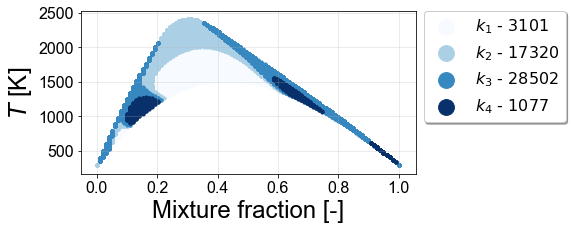

In [28]:
if save_plots==True: save_filename = '../images/tutorial-clustering-close-to-zero-source-terms-k4.svg'
plt = preprocess.plot_2d_clustering(mixture_fraction, X[:,0], idx_close_to_zero_source_terms, x_label='Mixture fraction [-]', y_label='$T$ [K]', color_map='Blues', first_cluster_index_zero=False, grid_on=True, figure_size=figure_size, save_filename=save_filename)

From the verbose information, we can see that the first cluster ($k_1$) contains observations
corresponding to the highly negative values of $S_{Z,1}$, the second cluster ($k_2$)
to the close-to-zero but negative values of $S_{Z,1}$, the third cluster ($k_3$) to the
close-to-zero but positive values of $S_{Z,1}$ and the fourth cluster ($k_4$) to the
highly positive values of $S_{Z,1}$.

We can further merge the two clusters that contain observations corresponding to the high magnitudes
of $S_{Z, 1}$ into one cluster. This can be achieved using the function
``flip_clusters``. We change the label of the fourth cluster to ``0`` and thus all
observations from the fourth cluster are now assigned to the first cluster.

In [29]:
idx_merged = preprocess.flip_clusters(idx_close_to_zero_source_terms, {3:0})

The visual result of this merged clustering can be seen below:

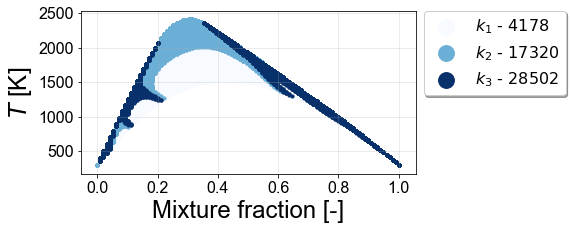

In [30]:
if save_plots==True: save_filename = '../images/tutorial-clustering-close-to-zero-source-terms-merged-k4.svg'
plt = preprocess.plot_2d_clustering(mixture_fraction, X[:,0], idx_merged, x_label='Mixture fraction [-]', y_label='$T$ [K]', color_map='Blues', first_cluster_index_zero=False, grid_on=True, figure_size=figure_size, save_filename=save_filename)

If we further plot the two-dimensional flamelet manifold, colored by $S_{Z, 1}$,
we can check that the clustering technique correctly identified the regions on the manifold
where $S_{Z, 1} \approx 0$ as well as the regions where $S_{Z, 1}$ has high
positive or high negative magnitudes.

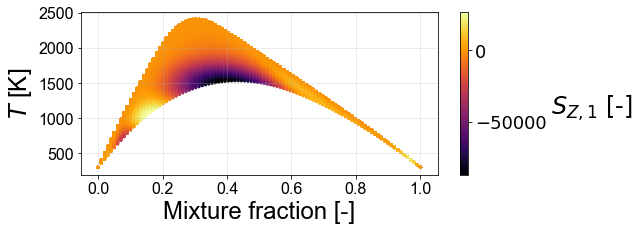

In [31]:
if save_plots==True: save_filename = '../images/tutorial-clustering-close-to-zero-source-terms-manifold.svg'
plt = reduction.plot_2d_manifold(mixture_fraction, X[:,0], color=S_Z[:,0], x_label='Mixture fraction [-]', y_label='$T$ [K]', color_map='inferno', colorbar_label='$S_{Z, 1}$ [-]', figure_size=(8,3), save_filename=save_filename)

<a id='references'></a>

***

## References

[**↑ Go to the top**](#top-page)

> [[1]](#combustion) [M. A. Hansen - *Spitfire*, 2020](https://github.com/sandialabs/Spitfire)
>
> [[2]](#combustion) E. R. Hawkes, R. Sankaran, J. C. Sutherland, J. H. Chen - *Scalar mixing in direct numerical simulations of temporally evolving plane jet flames with skeletal co/h2 kinetics*, Proceedings of the combustion institute 31 (1) (2007) 1633–1640

***